# Name: Dnyanal Shelke
# TY D Roll no:22
# Gr No:11810571

## Assignment 7: Sentiment Analysis
###  Twitter dataset

In [1]:
%autosave 1

Autosaving every 1 seconds


## Importing Libraries

In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 

## Importing Dataset

In [3]:
train  = pd.read_csv(r"C:\Users\hp\Documents\DS LAB\twitter_train.csv")
test  = pd.read_csv(r"C:\Users\hp\Documents\DS LAB\twitter_test.csv")

## Printing Shape of Dataset

In [4]:
print(train.shape)

(31962, 3)


In [5]:
print(test.shape)

(17197, 2)


## Printing top entries of both datasets

In [6]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


## Checking is there any null value or not

In [8]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

## Checking out the Positive comments from the train set

In [9]:
train[train['label'] == 0].head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


## Checking out the Negative comments from the train set  

In [10]:
train[train['label'] == 1].head(20)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


## Visualizing above statistics

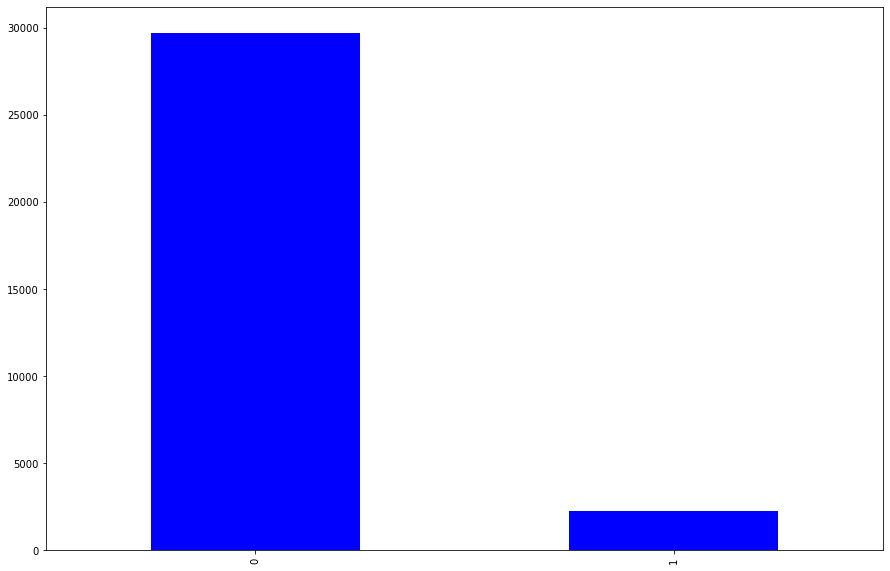

In [18]:
train['label'].value_counts().plot.bar(color = 'blue', figsize = (15, 10))

## Removing unwanted text patterns from the tweets.

In [11]:
combi = train.append(test, ignore_index=True)

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

## Remove twitter handles (@user)

In [13]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

## Removing special characters, numbers, punctuations

In [14]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

## Removing Short words

In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [17]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


##  Checking the distribution of tweets in the data

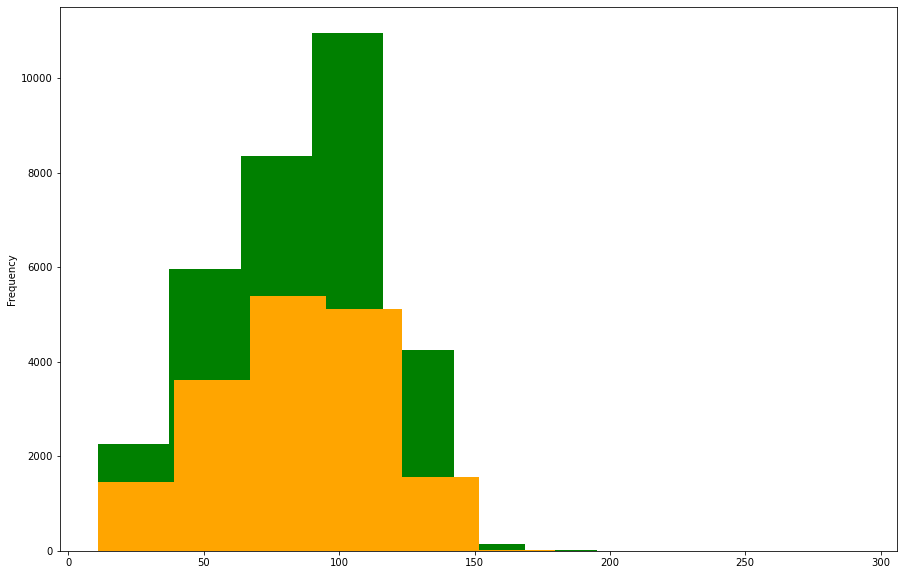

In [20]:
length_train = train['tweet'].str.len().plot.hist(color = 'green', figsize = (15,10))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (15,10))

## Adding a column to represent the length of the tweet

In [22]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head()

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [23]:
test.head()

,id,tweet,len
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93


## Grouping by label

In [24]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

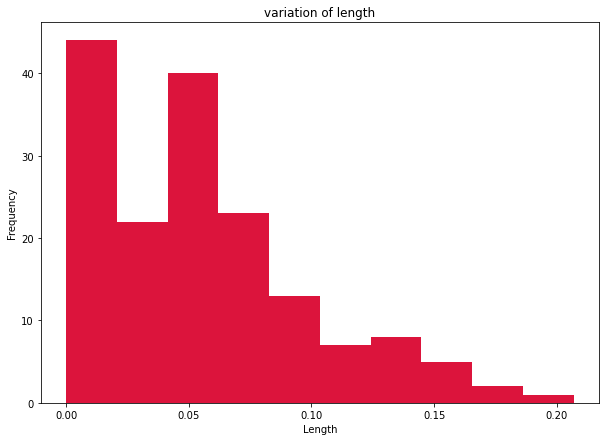

In [25]:
train.groupby('len').mean()['label'].plot.hist(color = 'crimson', figsize = (10, 7),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

## Most commonly used words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

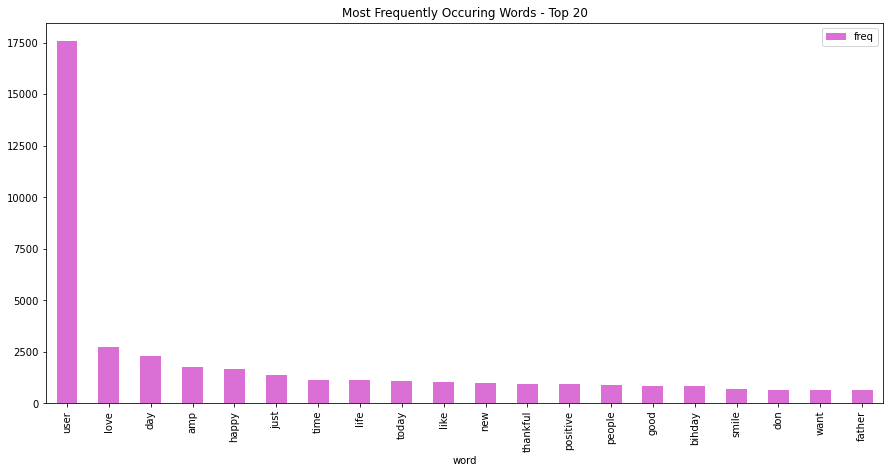

In [26]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'orchid')
plt.title("Most Frequently Occuring Words - Top 20")


In [27]:
!pip install WordCloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

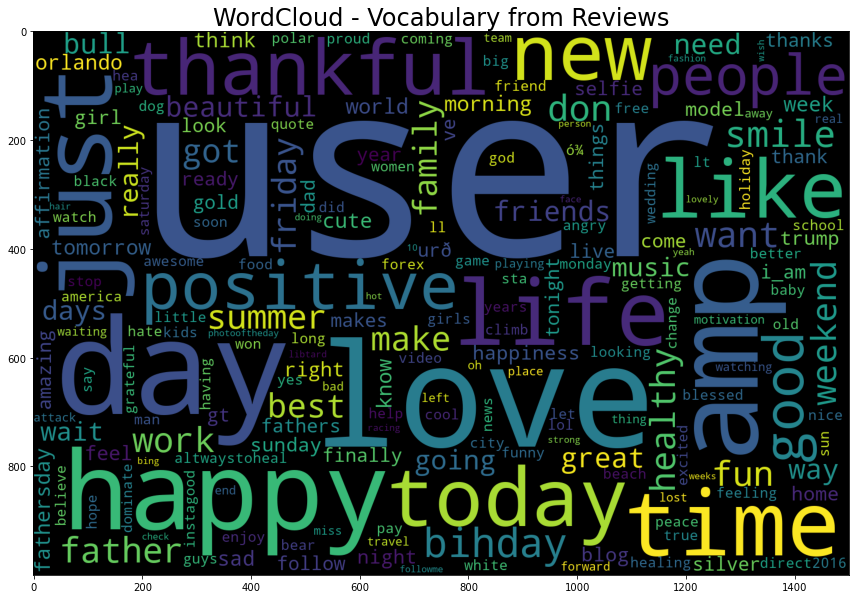

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'black', width = 1500, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 24)

## Words in non racist/sexist tweets

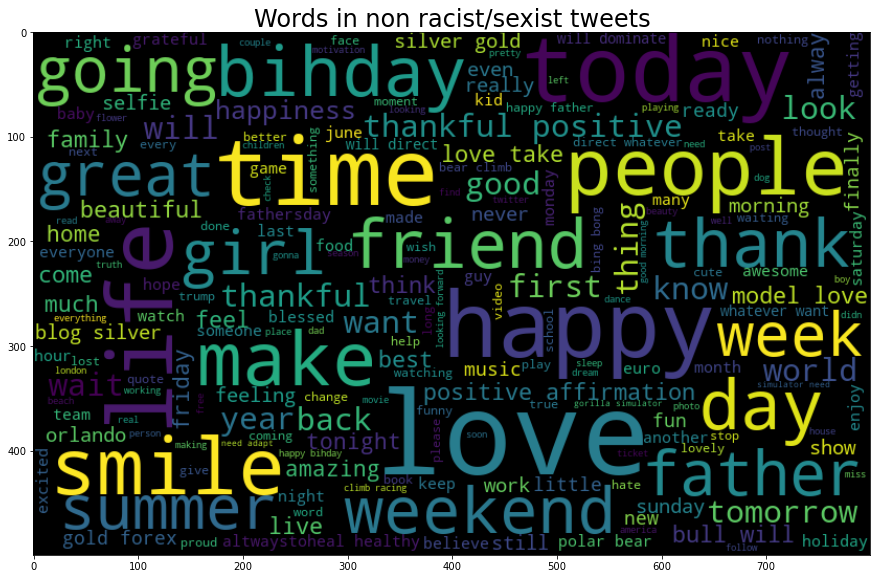

In [29]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Words in non racist/sexist tweets", fontsize = 24)
plt.show()

## Words in racist/sexist tweets

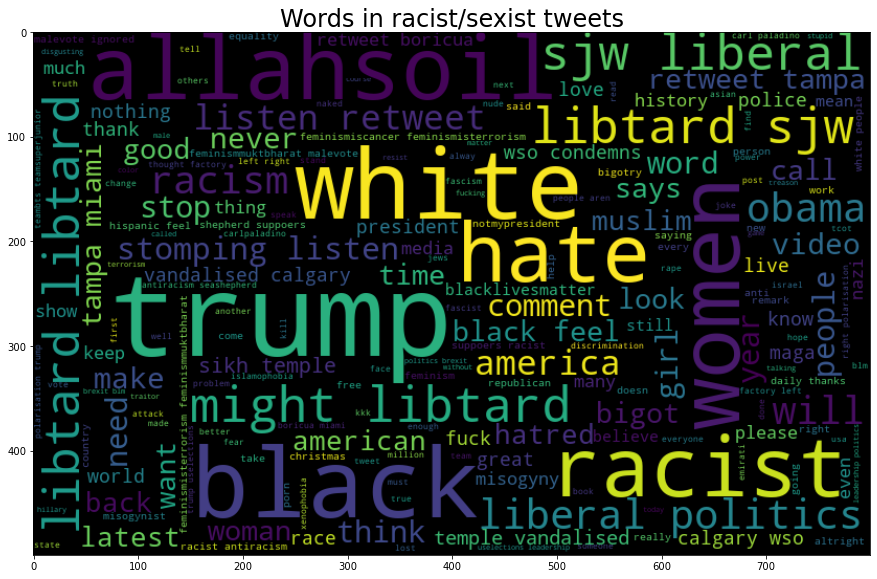

In [30]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Words in racist/sexist tweets", fontsize = 24)
plt.show()

## Collecting Hashtags
### Hashtag function

In [31]:
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

## Extracting hashtags from non racist/sexist tweets

In [32]:
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

## Extracting hashtags from racist/sexist tweets

In [33]:
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

## Unnesting list

In [34]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [35]:
print(HT_regular)

['run', 'lyft', 'disapointed', 'getthanked', 'model', 'motivation', 'allshowandnogo', 'school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', 'allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers', 'gr8', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshooting', 'orlandoshooting', 'biggerproblems', 'selfish', 'heabreaking', 'values', 'love', '80days', 'gettingfed', 'got7', 'junior', 'yugyoem', 'omg', 'thankful', 'positive', 'friday', 'cookies', 'euro2016', 'badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs', 'wine', 'weekend', 'tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssas', 'love', 'smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback', 'ica16', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift1989', 'travelingram', 'dalat', 'ripinkylife', 'photoshop', 'enoughisenough', 'd

In [36]:
print(HT_negative)

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins', 'neverump', 'xenophobia', 'love', 'peace', 'race', 'identity', 'medâ', 'altright', 'whitesupremacy', 'linguistics', 'race', 'power', 'raciolinguistics', 'brexit', 'people', 'trump', 'republican', 'michelleobama', 'knicks', 'golfâ', 'jewishsupremacist', 'libtard', 'sjw', 'liberal', 'politics', 'trash', 'hate', 'â', 'stereotyping', 'prejudice', 'hope', 'hate', 'conflictâ', 'pols', 'bluelivesmatter', 'draintheswamp', 'ferguson', '2016', 'antisemitism', 'hocoschools', 'columbiamd', 'hocomd', 'nazi', 'hatred', 'bigotry', 'libtard', 'sjw', 'liberal', 'politics', 'p2', 'p21', 'fyi', 'tcot', 'topoli', 'blacklivesmatter', 'ushistory', 'eugenics', 'biherism', 'bigotry', 'altright', 'potus', 'theresistance', 'crime', 'officerâ', 'black', 'retweet', 'tampa', 'miamiâ', 'allahsoil', 'praised', 'cleveland', 'rnc', 'white', 'tamirrice', 'rip', 'bigot', 'blacklivesmatter', 'feminis

## Positive Tweets

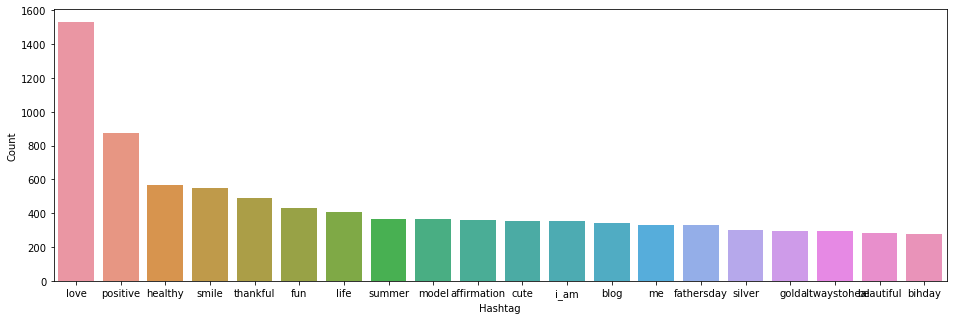

In [37]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Negative Tweets

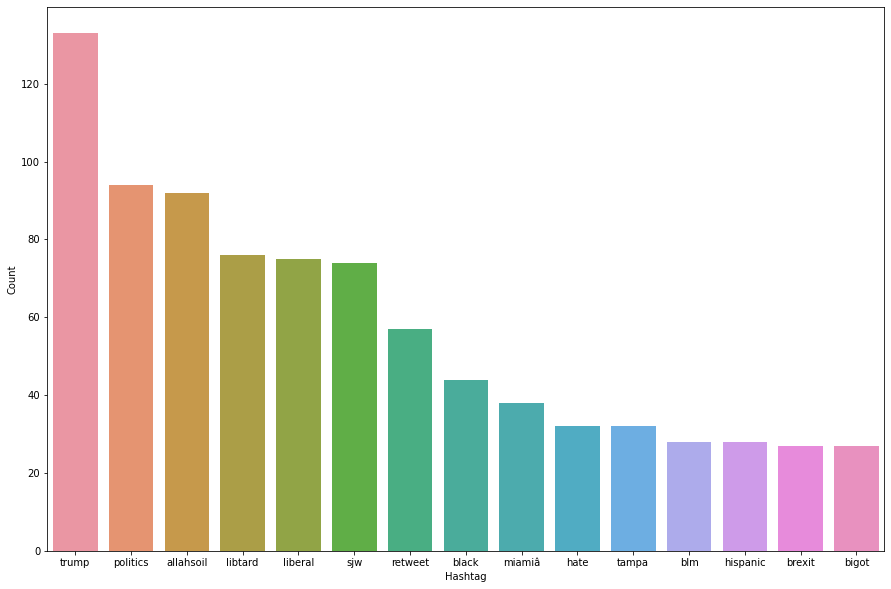

In [38]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 15)   
plt.figure(figsize=(15,10))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Bag of Words Features

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

## Bulding a model 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()

# training the model
lreg.fit(xtrain_bow, ytrain) 

 # predicting on the validation set
prediction = lreg.predict_proba(xvalid_bow)

# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

 # calculating f1 score
f1_score(yvalid, prediction_int)

0.5017421602787456

## Thank You